# 神经网络

## 1.激活函数

单层感知机实现函数为`w1*x1+w2*x2+b`,我们用一个函数来表示这种分情况的动作（超过0则输出1，否则输出0）。

引入新函数h(x)。令 `y = h(w1*x1+w2*x2+b)` 则有：

![](https://gitee.com/liuyang0001/blogimage/raw/master/img/20200525223221.png)

刚才登场的h（x）函数会将输入信号的总和转换为输出信号，这种函数一般称为激活函数（activation function）。如“激活”一词所示，激活函数的作用在于决定如何来激活输入信号的总和。

现在来进一步改写上式。将其分两个阶段进行处理，先计算输入信号的加权总和，然后用激活函数转换这一总和。

因此，可以分成下面两个式子：

![](https://gitee.com/liuyang0001/blogimage/raw/master/img/20200525223423.png)

首先，计算加权输入信号和偏置的总和，记为a。然后，用h(a)函数将a转换为输出y。

![](https://gitee.com/liuyang0001/blogimage/raw/master/img/20200525212456.png)

如图所示，表示神经元的○中明确显示了激活函数的计算过程，即信号的加权总和为节点a，然后节点a被激活函数h() 转换成节点y。

### 1.1 阶跃函数
上述表示的激活函数以阈值为界，一旦输入超过阈值，就切换输出。
这样的函数称为“阶跃函数”。因此，可以说感知机中使用了阶跃函数作为激活函数。也就是说，在激活函数的众多候选函数中，感知机使用了阶跃函数。

![](https://gitee.com/liuyang0001/blogimage/raw/master/img/20200525223221.png)

#### 1.1.1 阶跃函数的实现

In [3]:
import numpy as np
# 阶跃函数的实现
def step_function(x):
    y = x>0
    # 将结果转换成np类型
    return y.astype(np.int)
# 测试
step_function(np.array([1,2]))

array([1, 1])

#### 1.1.2 阶跃函数的图形

使用Matplotlib绘制阶跃函数的图形

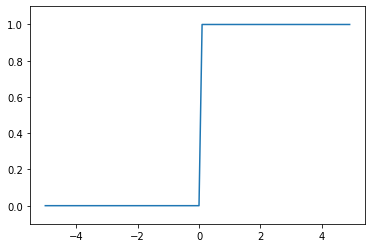

In [4]:
import matplotlib.pylab as plt
# 定义参数
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围
plt.show()

### 1.2 sigmoid 函数
神经网络中经常使用的一个激活函数就是sigmoid 函数（sigmoid function）。

![](https://gitee.com/liuyang0001/blogimage/raw/master/img/20200525224508.png)

式中的exp(−x)表示e**x 的意思。e是纳皮尔常数2.7182...。sigmoid函数看上去有些复杂，但它也仅仅是个函数而已。而函数就是给定某个输入后，会返回某个输出的转换器。比如，向sigmoid函数输入1.0或2.0后，就会有某个值被输出，类似h(1.0) = 0.731...、h(2.0) = 0.880...这样。神经网络中用sigmoid 函数作为激活函数，进行信号的转换，转换后的信号被传送给下一个神经元。实际上，感知机和接下来要介绍的神经网络的主要区别就在于这个激活函数。其他方面，比如神经元的多层连接的构造、信号的传递方法等，基本上和感知机是一样的。下面，我们通过和阶跃函数的比较来详细学习作为激活函数的sigmoid函数。

#### 1.2.1 Sigmod函数的实现

这里并不需要什么特殊的处理，x为np.array时也能够正常的进行处理并返回。这里用到了之前说的广播功能，np.array进行计算会自动填充。

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#### 1.2.2 sigmod函数的绘制

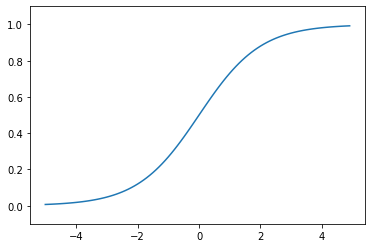

In [6]:
# 计算参数值
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围
plt.show()

### 1.3 阶跃函数和sigmod函数比较

#### 不同点

首先注意到的是“平滑性”的不同。sigmoid 函数是一条平滑的曲线，输出随着输入发生连续性的变化。而阶跃函数以0 为界，输出发生急剧性的变化。sigmoid 函数的平滑性对神经网络的学习具有重要意义。

另一个不同点是，相对于阶跃函数只能返回0 或1，sigmoid 函数可以返回0.731、0.880等实数（这一点和刚才的平滑性有关）。也就是说，**感知机中神经元之间流动的是0 或1 的二元信号，而神经网络中流动的是连续的实数值信号。**



#### 相同点

阶跃函数和sigmoid函数虽然在平滑性上有差异，但是如果从宏观视角看，可以发现它们具有相似的形状。实际上，两者的结构均是“输入小时，输出接近0（为0）；随着输入增大，输出向1 靠近（变成1）”。也就是说，**当输入信号为重要信息时，阶跃函数和sigmoid函数都会输出较大的值；当输入信号为不重要的信息时，两者都输出较小的值**。

还有一个共同点是，不管输入信号有多小，或者有多大，输出信号的值都在0 到1 之间。

两者都为非线性函数。

### 1.4 ReLu函数

在神经网络发展的历史上，sigmoid 函数很早就开始被使用了，而最近则主要使用ReLU（Rectified Linear Unit）函数。ReLU函数在输入大于0时，直接输出该值；在输入小于等于0时，输出0。
ReLU函数可以表示为下面的式子：

![](https://gitee.com/liuyang0001/blogimage/raw/master/img/20200525232156.png)

#### 1.4.1 ReLU的实现

这里使用了NumPy的maximum函数。maximum函数会从输入的数值中选择较大的那个值进行输出。

In [7]:
def relu(x):
    return np.maximum(0, x)

#### 1.4.2 ReLU函数的绘制

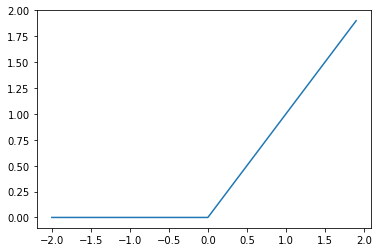

In [8]:
x = np.arange(-2.0, 2.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 2) # 指定y轴的范围
plt.show()

## 2.多维数组的运算

In [9]:
A = np.array([[1,2], [3,4], [5,6]])
A.shape # 获取数组的“形状”
np.ndim(A) # 获取当前np数组的维数

2

### 2.1 矩阵乘法



In [10]:
A = np.array([[1,2,3], [4,5,6]]) # 2x3
B = np.array([[1,2], [3,4], [5,6]]) # 3x2
np.dot(A, B) # 矩阵乘法（点积）

array([[22, 28],
       [49, 64]])

在多维数组的乘积运算中，必须使两个矩阵中的对应维度的元素个数一致，这一点很重要。

![](https://gitee.com/liuyang0001/blogimage/raw/master/img/20200525234704.png)

### 2.2 神经网络的内积

下面我们使用NumPy矩阵来实现神经网络。这里我们以图中的简单神经网络为对象。这个神经网络省略了偏置和激活函数，只有权重。

![](https://gitee.com/liuyang0001/blogimage/raw/master/img/20200525235000.png)

In [11]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])
Y = np.dot(X,W)
print("X:{} W:{} Y:{}".format(X.shape,W.shape,Y.shape))
print(Y)

X:(2,) W:(2, 3) Y:(3,)
[ 5 11 17]


使用np.dot（多维数组的点积），可以一次性计算出Y的结果。这意味着，即便Y 的元素个数为100或1000，也可以通过一次运算就计算出结果！如果不使用np.dot，就必须单独计算Y的每一个元素（或者说必须使用for语句），非常麻烦。因此，通过矩阵的乘积一次性完成计算的技巧，在实现的层面上可以说是非常重要的。

## 3.三层神经网络的实现

![](https://gitee.com/liuyang0001/blogimage/raw/master/img/20200526002446.png)

### 3.1符号确认

如图所示，权重和隐藏层的神经元的右上角有一个“(1)”，它表示权重和神经元的层号（即第1层的权重、第1层的神经元）。此外，权重的右下角有两个数字，它们是后一层的神经元和前一层的神经元的索引号。比如，w<sub>12</sub><sup>(1)</sup>表示前一层的第2个神经元x<sub>2</sub>到后一层的第1个神经元a<sub>1</sub><sup>(1)</sup>的权重。权重右下角按照“后一层的索引号、前一层的索引号”的顺序排列。

![](https://gitee.com/liuyang0001/blogimage/raw/master/img/20200526154023.png)

### 3.2 各层之间信号的传递

![](https://gitee.com/liuyang0001/blogimage/raw/master/img/20200526154632.png)

如上图，该如何计算a<sub>1</sub><sup>(1)</sup>呢？

![](https://gitee.com/liuyang0001/blogimage/raw/master/img/20200526154829.png)

如果使用矩阵的乘法运算，则可以将第1层的加权和表示成下面：

![](https://gitee.com/liuyang0001/blogimage/raw/master/img/20200526155040.png)


In [12]:
# 用NumPy实现上述算法
X = np.array([1,2]) # 1x2
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 2x3
B1 = np.array([0.1, 0.2, 0.3]) # 1x3
A1 = np.dot(X,W1)+B1 # 1x3
print(A1)

[0.6 1.3 2. ]


接下来，我们观察第1层中激活函数的计算过程。如果把这个计算过程用图来表示的话，则如图所示。

![](https://gitee.com/liuyang0001/blogimage/raw/master/img/20200526160058.png)

隐藏层的加权和（加权信号和偏置的总和）用a表示，被激活函数转换后的信号用z表示。此外，图中h()表示激活函数，这里我们使用的是sigmoid函数。用Python来实现，代码如下所示。

In [13]:
Z1 = sigmoid(A1)
print(A1,Z1)

[0.6 1.3 2. ] [0.64565631 0.78583498 0.88079708]


下面，我们来实现第1 层到第2层的信号传递。

![](https://gitee.com/liuyang0001/blogimage/raw/master/img/20200526161116.png)

In [14]:
# 第二层的权重
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) 
# 第二层的偏置
B2 = np.array([0.1, 0.2])
print("Z1:",Z1.shape,"W2:",W2.shape,"B2:",B2.shape)
# 计算 A2 = Z1·W2 +B2
A2 = np.dot(Z1, W2) + B2
# 激活函数处理
Z2 = sigmoid(A2)
print(A2,Z2)

Z1: (3,) W2: (3, 2) B2: (2,)
[0.58597175 1.37965826] [0.64244035 0.79893611]


最后是第2层到输出层的信号传递。输出层的实现也和之前的实现基本相同。不过，最后的激活函数和之前的隐藏层所不同。这里我们定义了identity_function()函数（也称为“恒等函数”），并将其作为输出层的激活函数。恒等函数会将输入按原样输出，因此，这个例子中没有必要特意定义identity_function()。这里这样实现只是为了和之前的
流程保持统一。另外，图中，输出层的激活函数用σ()（σ读作sigma）表示，不同于隐藏层的激活函数h()。

![](https://gitee.com/liuyang0001/blogimage/raw/master/img/20200526161648.png)


In [15]:
# 激活函数：恒等函数
def identity_function(x):
    return x
# 第三层的权重
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
# 第三层的偏置
B3 = np.array([0.1, 0.2])
# 计算第三层的输出
A3 = np.dot(Z2, W3) + B3
# 通过激活函数输出结果Y
Y = identity_function(A3) # 或者Y = A3

### 3.3 代码实现小结

现在我们把之前的代码实现全部整理一下。这里，我们按照神经网络的实现惯例，只把权重记为大写字母W1，其他的（偏置或中间结果等）都用小写字母表示。

In [16]:
# 初始化神经网络的权重和偏置
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

In [17]:
# 前向传播：即输入——>输出
def forward(network,x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y


In [18]:
# 定义网络结构
network = init_network()
# 输入
x = np.array([1.0, 0.5])
# 输出
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


这里出现了forward（前向）一词，它表示的是从输入到输出方向的传递处理。后面在进行神经网络的训练时，我们将介绍后向（backward，从输出到输入方向）的处理。至此，神经网络的前向处理的实现就完成了。通过巧妙地使用NumPy多维数组，我们高效地实现了神经网络。

### 3.4 输出层的设计

神经网络可以用在分类问题和回归问题上，不过需要根据情况改变输出层的激活函数。一般而言，回归问题用恒等函数，分类问题用softmax函数。




#### 3.4.1 softmax函数

分类问题中使用的softmax 函数可以用下面的式子表示。

![](https://gitee.com/liuyang0001/blogimage/raw/master/img/20200526164318.png)

exp(x) 是表示e<sup>x</sup>的指数函数（e是纳皮尔常数2.7182）。

假设输出层共有n个神经元，计算第k个神经元的输出y<sub>k</sub>。
softmax函数的分子是输入信号a<sub>k</sub>的指数函数，分母是所有输入信号的指数函数的和。

![](https://gitee.com/liuyang0001/blogimage/raw/master/img/20200624191946.png)

#### softmax的实现

In [19]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

#### 缺陷与改进

上述函数还是存在着数据溢出的风险，e<sup>100</sup>会变成一个后面有40多个0的超大值，e<sup>1000</sup> 的结果会返回一个表示无穷大的`inf`。如果在这些超大值之间进行除法运算，结果会出现“不确定”的情况。

对上面的softmax函数进行改写：

![](https://gitee.com/liuyang0001/blogimage/raw/master/img/20200624193310.png)

在进行softmax 的指数函数的运算时，加上（或者减去）某个常数并不会改变运算的结果。这里的C<sup>'<sup>可以使用任何值，但是为了防止溢出，一般会使用输入信号中的最大值.

因此，我们修改下上面的函数：

In [20]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [21]:
# 测试
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


softmax函数的输出是0.0 到1.0之间的实数。并且，softmax函数的输出值的总和是1。输出总和为1 是softmax 函数的一个重要性质。正因为有了这个性质，我们才可以把softmax 函数的输出解释为“概率”。比如，上面的例子可以解释成y[0]的概率是0.018（1.8%），y[1]的概率是0.245（24.5%），y[2]的概率是0.737（73.7%）。从概率的结果来看，可以说“因为第2个元素的概率最高，所以答案是第2个类别”。而且，还可以回答“有74%的概率是第2个类别，有25%的概率是第1 个类别，有1%的概率是第0 个类别”。也就是说，通过使用softmax函数，我们可以用概率的（统计的）方法处理问题。

一般而言，神经网络只把输出值最大的神经元所对应的类别作为识别结果。并且，即便使用softmax函数，输出值最大的神经元的位置也不会变。因此，神经网络在进行分类时，输出层的softmax函数可以省略。在实际的问题中，由于指数函数的运算需要一定的计算机运算量，因此输出层的softmax函数一般会被省略。